# Дипломное задание
Данные - реальная компания, продающая оборудование. Они подкорректированные , т.к. под NDA  
Берем оттуда месяц и год продаж, клиенты, сумма продаж.  
Необходимо проанализировать продажи и дать рекомендации бизнесу  
По итогу   
дадим рекомендацию по кол-во сейос менеджеров в отделе продаж  
предскажим оборот на ближайщее время  
построим модели , предсказывающие продажи в августе  

In [1]:
import numpy as np
import pandas as pd # Для работы с данными

In [2]:
# read_file = pd.read_html('client_months_with_category.html')
read_file = pd.read_html('Clients_month_without_category.html')

In [3]:
df = read_file[0].copy()

In [4]:
# df.head()

приводим год и месяц к единному значению в виде MonthCYYear

In [5]:
# for i in range(44): #  c категориями
#     df[i+2][2] = str(df[i+2][2]) + 'CY' + str(df[i+2][1])
for i in range(44):
    df[i+1][2] = str(df[i+1][2]) + 'CY' + str(df[i+1][1])

In [6]:
# df.head()

In [7]:
df_columns = ['Клиент']
for i in range(1,45): # 46 с категориями
    df_columns.append(df[i][2])
# df_columns

In [8]:
#название столбцов - месяц и год
df.columns = df_columns

In [9]:
df.drop([0, 2], inplace = True)
df = df.reset_index(drop=True)

In [10]:
df.drop([0, 0], inplace = True)
df = df.reset_index(drop=True)

In [11]:
for i in range(10):
    df['Клиент'][i] = 'Клиент' + str(i) #убираем реальные названия клиентов для отображения

In [12]:
df.head()

,Клиент,01CY2019,02CY2019,03CY2019,04CY2019,05CY2019,06CY2019,07CY2019,08CY2019,09CY2019,...,11CY2021,12CY2021,01CY2022,02CY2022,03CY2022,04CY2022,05CY2022,06CY2022,07CY2022,08CY2022
0,Клиент0,"23 926,79","1 624,59","3 485,68","11 250,06",90042,"1 562,56","7 589,66","17 233,61","6 799,47",...,"69 702,14","152 622,41","70 961,73","90 172,79","177 155,75","166 707,59","16 567,92","37 767,15",001,NaN
1,Клиент1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36836,...,"8 372,88",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Клиент2,NaN,NaN,14024,5980,61200,NaN,NaN,NaN,NaN,...,NaN,"1 452,00",NaN,23200,NaN,NaN,NaN,NaN,NaN,NaN
3,Клиент3,NaN,NaN,NaN,87850,NaN,13100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Клиент4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46040,44488,NaN,NaN,NaN,NaN,NaN,"9 490,80",NaN,NaN


In [ ]:
# df['Категория'].fillna('Неопределена', inplace = True)

In [13]:
#Если холдинг (клиент) непределен, то называем его Неизвестен
df['Клиент'].fillna('Неизвестен', inplace = True)

In [14]:
# for i in df_columns[2:]:
#     df[i].fillna(0, inplace = True)

for i in df_columns[1:]:
    df[i].fillna(0, inplace = True)
    
   

In [15]:
df.head(5)

,Клиент,01CY2019,02CY2019,03CY2019,04CY2019,05CY2019,06CY2019,07CY2019,08CY2019,09CY2019,...,11CY2021,12CY2021,01CY2022,02CY2022,03CY2022,04CY2022,05CY2022,06CY2022,07CY2022,08CY2022
0,Клиент0,"23 926,79","1 624,59","3 485,68","11 250,06",90042,"1 562,56","7 589,66","17 233,61","6 799,47",...,"69 702,14","152 622,41","70 961,73","90 172,79","177 155,75","166 707,59","16 567,92","37 767,15",001,0
1,Клиент1,0,0,0,0,0,0,0,0,36836,...,"8 372,88",0,0,0,0,0,0,0,0,0
2,Клиент2,0,0,14024,5980,61200,0,0,0,0,...,0,"1 452,00",0,23200,0,0,0,0,0,0
3,Клиент3,0,0,0,87850,0,13100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Клиент4,0,0,0,0,0,0,0,0,0,...,46040,44488,0,0,0,0,0,"9 490,80",0,0


In [16]:
df.shape

(4052, 45)

In [17]:
#приводим значения к числу, т.к. есть пробелы и т.д.
for i in df_columns[1:]:
#     print(i)
    df[i] = df[i].str.replace(',.*', '')#.copy()
    df[i].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
    df[i] = df[i].astype(float)
    df[i].fillna(0, inplace = True)

In [57]:
# pip install chart-studio

In [18]:
from chart_studio import plotly
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#считаем оборот компании
Sum_turnover_list = []

for i in df_columns[1:]:
#     print(df[i].sum())
#     new_row = df[i][ df[i] > 0 ].sum()
    Sum_turnover_list.append( df[i][ df[i] > 0 ].sum())

# print(Sum_turnover_list)

df_turnover_months = pd.Series(Sum_turnover_list)
df_turnover_months.index = df_columns[1:]
# print(df_turnover_months)

In [96]:
# df_turnover_months.head()
# df_turnover_months.index

In [20]:
df_turnover_months = pd.DataFrame({'Month':df_turnover_months.index, 'Turnover':df_turnover_months.values})

строим график оборота компании

<ipython-input-24-c93f5659494b>:24: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



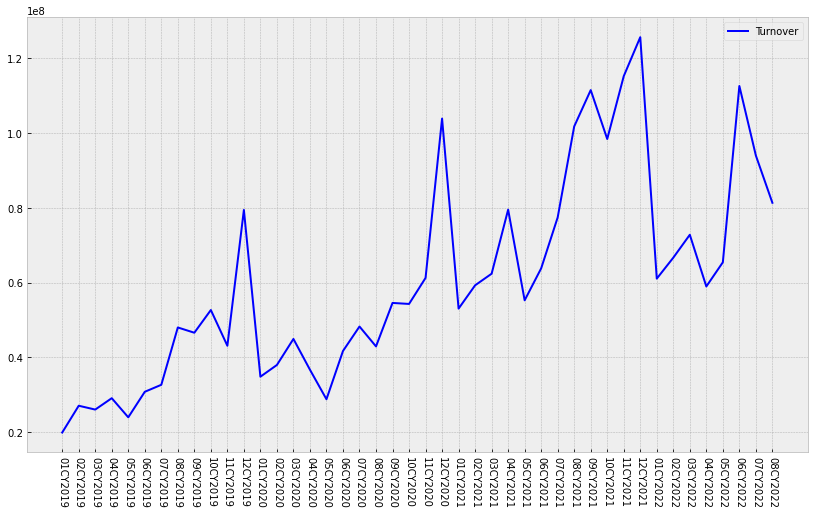

In [24]:
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs
# plot_data = [
#     go.Scatter(
#         x=df_turnover_months['Month'],
#         y=df_turnover_months['Turnover'],
#     )
# ]

# plot_layout = go.Layout(
#         xaxis={"type": "category"},
#         title='Montly Revenue'
#     )
# fig = go.Figure(data=plot_data, layout=plot_layout)

# pyoff.iplot(fig)

with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = df_turnover_months['Month']#plt.axes()
#     best_mdl.plot_predict(1, len(series)+100, ax=ax)
    plt.plot(df_turnover_months['Month'],
             df_turnover_months['Turnover'] , color='blue', label='Turnover') #(1, len(series)+100, ax=ax)
    plt.legend()
    plt.xticks (Rotation = -90)
    plt.show()

строим график процентного отношения оборота

<ipython-input-25-62642aeeb3f2>:28: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



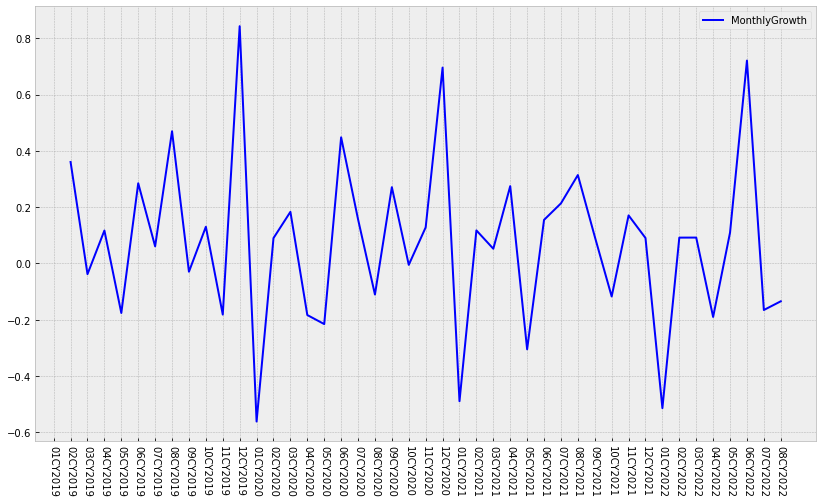

In [25]:
#using pct_change() function to see monthly percentage change
df_turnover_months['MonthlyGrowth'] = df_turnover_months['Turnover'].pct_change()

#showing first 5 rows
# df_turnover_months.head()

#visualization - line graph
# plot_data = [
#     go.Scatter(
#         x=df_turnover_months['Month'],
#         y=df_turnover_months['MonthlyGrowth'],
#     )
# ]

# plot_layout = go.Layout(
#         xaxis={"type": "category"},
#         title='Montly Growth Rate'
#     )

# fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = df_turnover_months['Month']#plt.axes()
#     best_mdl.plot_predict(1, len(series)+100, ax=ax)
    plt.plot(df_turnover_months['Month'],
             df_turnover_months['MonthlyGrowth'] , color='blue', label='MonthlyGrowth') 
    plt.xticks (Rotation = -90)
    plt.legend()
    plt.show()

очевидно, что пик продаж в декабре и самые маленькие продажи в мае

проанализируем количество клиентов каждый месяц, оборот которых больше clients_turnover_int каких-то едениц
берем 10 тыс , т.к. это основные клиенты приносящие доход (оборот)

<ipython-input-27-ef41a7896a57>:22: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



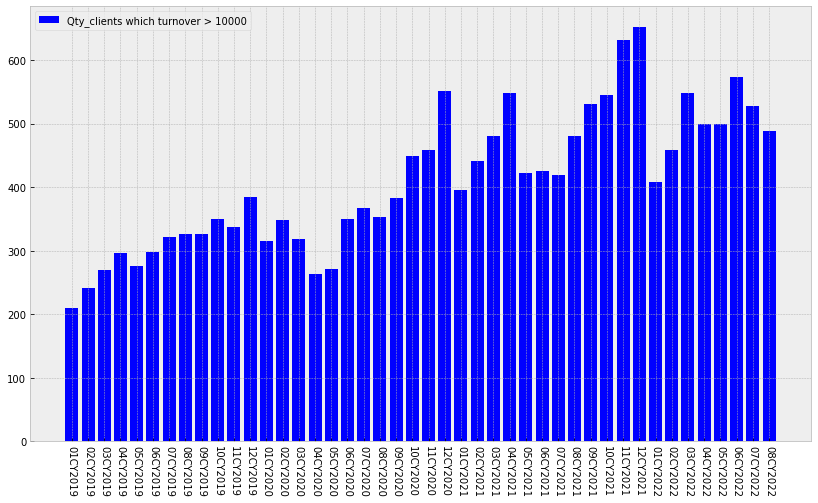

<ipython-input-27-ef41a7896a57>:22: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



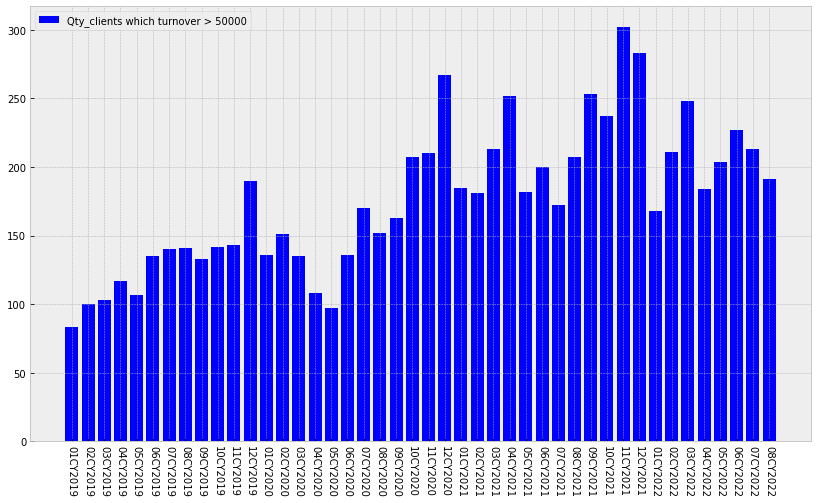

<ipython-input-27-ef41a7896a57>:22: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



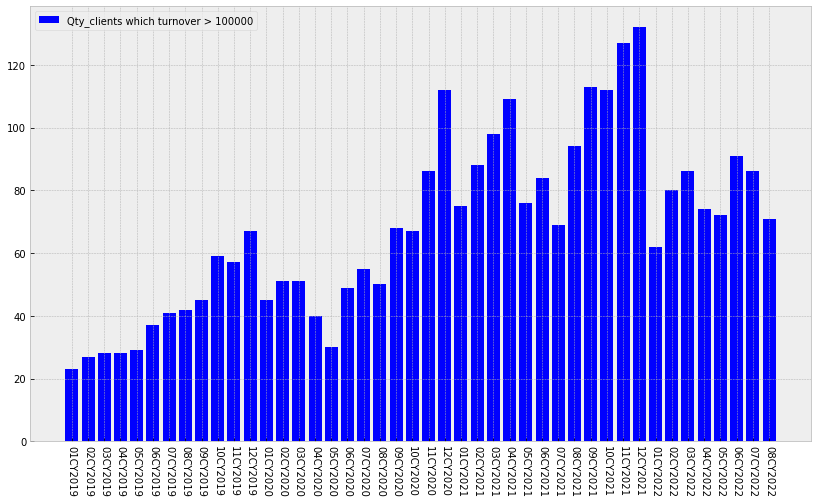

<ipython-input-27-ef41a7896a57>:22: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



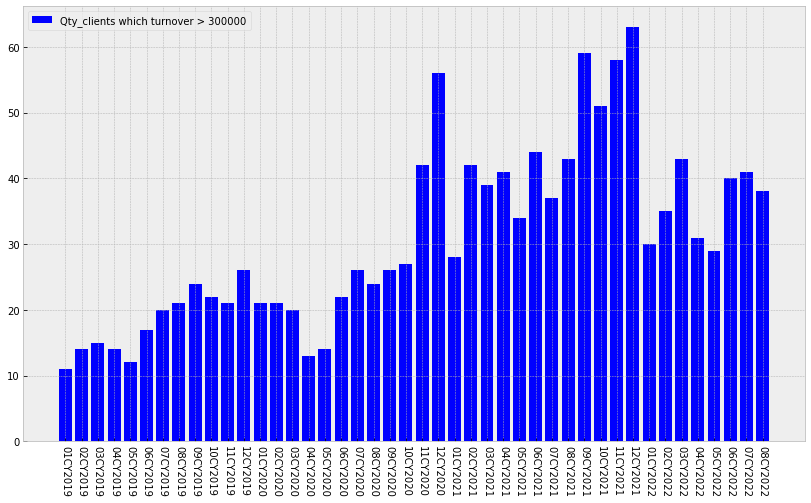

In [27]:
#количество клиентов каждый месяц

clients_turnover_list = [10000,50000,100000,300000]
# clients_turnover_int = 10000

for clients_turnover_int in clients_turnover_list:
    Qty_clients_list = []
    for i in df_columns[1:]:
        Qty_clients_list.append( df[i][ df[i] > clients_turnover_int].count() )

    # print(Qty_clients_list)

    df_Qty_clients_list = pd.Series(Qty_clients_list)
    df_Qty_clients_list.index = df_columns[1:]

    df_Qty_clients_list = pd.DataFrame({'Month':df_Qty_clients_list.index, 'Qty_clients':df_Qty_clients_list.values})
    with plt.style.context('bmh'):
        plt.figure(figsize=(14,8))
#         ax = df_Qty_clients_list['Month']#plt.axes()
        plt.bar(df_Qty_clients_list['Month'], df_Qty_clients_list['Qty_clients'] , color='blue', 
                label = 'Qty_clients which turnover > ' + str(clients_turnover_int)) 
        plt.xticks (Rotation = -90)
        plt.legend()
        plt.show()

#     plot_data = [
#         go.Bar(
#             x=df_Qty_clients_list['Month'],
#             y=df_Qty_clients_list['Qty_clients'],
#         )
#     ]

#     plot_layout = go.Layout(
#             xaxis={"type": "category"},
#             title='Qty_clients which turnover > ' + str(clients_turnover_int)
#         )

#     fig = go.Figure(data=plot_data, layout=plot_layout)
#     pyoff.iplot(fig)


здесь также видно, что кол-во клиентов максимально в декабре и минимально мае. 2022 год исключение. Здесь скорее всего сыграл какой-то внешний фактор. Возможно он был в феврале. Видимо у конкурентов не было товара и клиенты делали закупки в Компании. Из графиков видно, что новые клиенты - это клиенты с небольшим оборотом

Разделим всех клиентов на два типа : старые (Old_Client), которые покупают как минимум (qty_months_dont_buy+1) месяцев подряд
и не работающих (оборот менее sum_minimum_month)(Client_dont_work). Посмотрим как во времени эти параметры менялись

<ipython-input-28-69ccacbf0f77>:52: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>

<ipython-input-28-69ccacbf0f77>:53: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



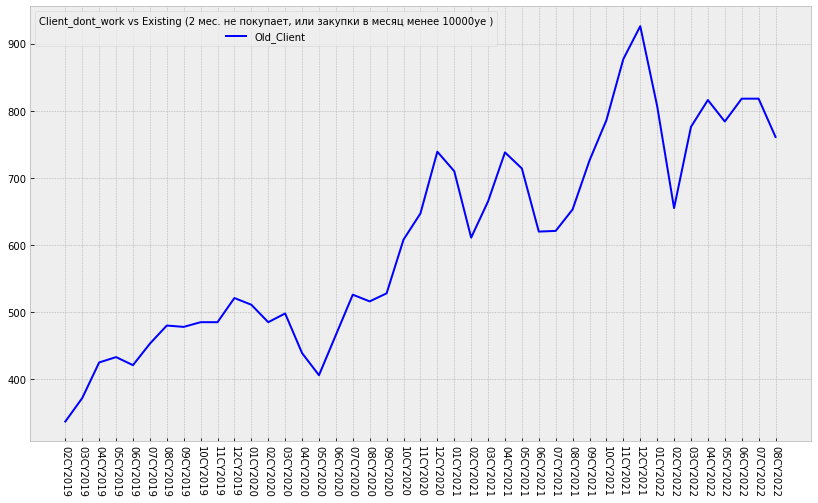

<ipython-input-28-69ccacbf0f77>:52: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>

<ipython-input-28-69ccacbf0f77>:53: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



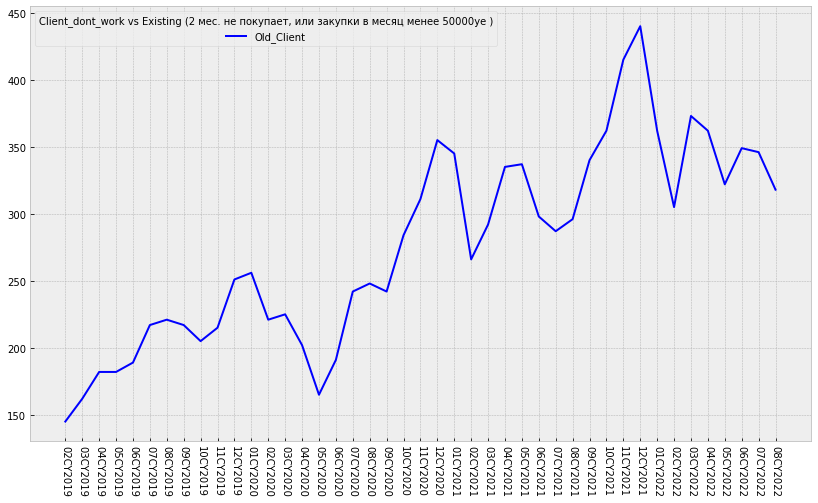

<ipython-input-28-69ccacbf0f77>:52: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>

<ipython-input-28-69ccacbf0f77>:53: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



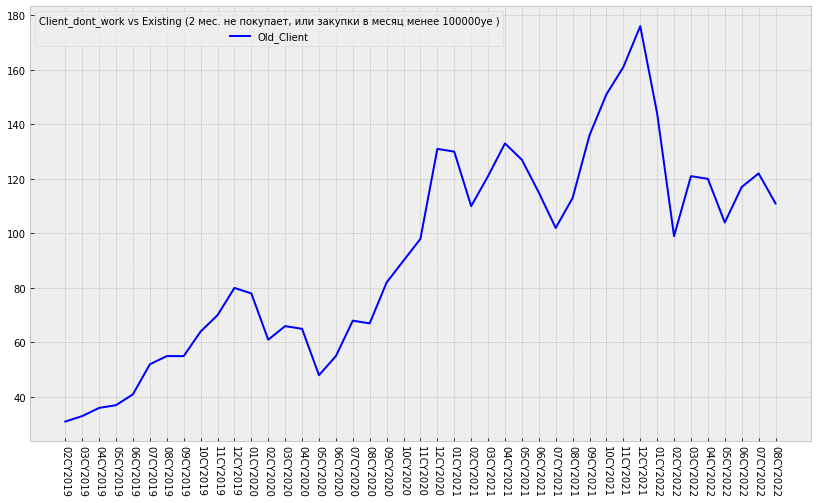

<ipython-input-28-69ccacbf0f77>:52: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>

<ipython-input-28-69ccacbf0f77>:53: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



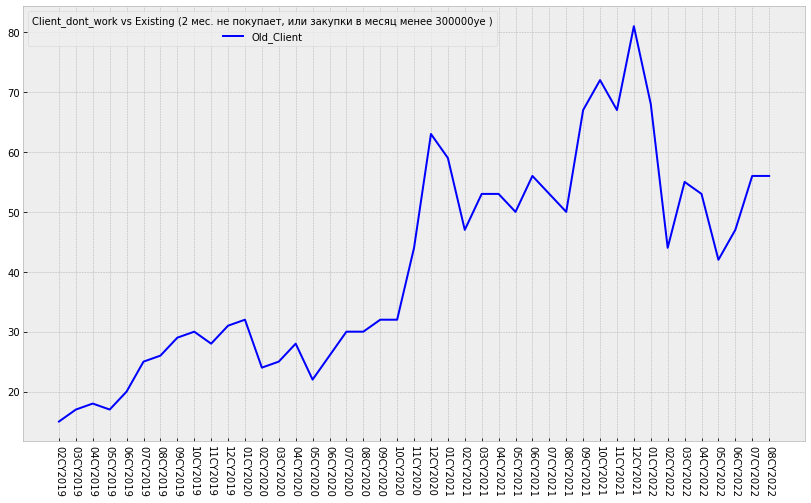

In [28]:
#строим график активных и неактивных клиентов по месяцам
df_new_client = pd.DataFrame({'Month':df_columns[1:]})
qty_months_dont_buy = 1
sum_minimum_month_list = [10000,50000,100000,300000]

for sum_minimum_month in sum_minimum_month_list:

    for index, row in df.iterrows():
        new_client = 0
        list_new_client = []
        for i in df_columns[1:]: 
            if row[i] > sum_minimum_month : 
                new_client = 0 #если есть оборот, то признак нового клиента обнуляем
            else : 
                new_client = new_client + 1
            if new_client > qty_months_dont_buy: #если клиент не берет более qty_months_dont_buy месяцев подряд, то это потенциально новый клиент. Или ушедший
                list_new_client.append('Client_dont_work')
            else :
                list_new_client.append('Old_Client')

        df_new_client[row['Клиент']] = list_new_client

    #транспонируем dataframe для удобства подсчета кол-в разных типов клиентов
    df_new_client_t = df_new_client.T.copy()
    df_new_client_t.columns = df_columns[1:]
    df_new_client_t = df_new_client_t.reset_index(drop=True)
    df_new_client_t.drop([0, 0], inplace = True)
    df_new_client_t.head()

    #считаем кол-ва активных и неактивных клиентов каждый месяц
    df_new_client_status = pd.DataFrame()
    df_new_client_status['Status'] = ['Client_dont_work', 'Old_Client']

    for i in df_columns[1:]:
        list_status_client = []
        list_status_client.append(df_new_client_t[df_new_client_t[i] == 'Client_dont_work'].count()[0])
        list_status_client.append(df_new_client_t[df_new_client_t[i] == 'Old_Client'].count()[0])
        df_new_client_status[i] = list_status_client

        
    with plt.style.context('bmh'):
        plt.figure(figsize=(14,8))
#         ax = df_Qty_clients_list['Month']#plt.axes()
        plt.plot(df_new_client_status.columns[2:], 
                 df_new_client_status[df_new_client_status['Status'] == 'Old_Client'].values.tolist()[0][2:] , color='blue', 
                label = 'Old_Client') 
#         plt.plot(df_new_client_status.columns[1:], 
#                  df_new_client_status[df_new_client_status['Status'] == 'Client_dont_work'].values.tolist()[0][1:] , color='red', 
#                 label = 'Client_dont_work') 
        plt.legend(title='Client_dont_work vs Existing (' + str(qty_months_dont_buy+1) + 
                     ' мес. не покупает, или закупки в месяц менее '+str(sum_minimum_month) + 'уе )')
        plt.locator_params(axis='x', nbins=10)
        plt.xticks (Rotation = -90)
        plt.show()
        

#     plot_data = [
#         go.Scatter(
#             x=df_new_client_status.columns[1:],
#             y=df_new_client_status[df_new_client_status['Status'] == 'Old_Client'].values.tolist()[0][1:],
#             name = 'Old_Client'
#         ),
#         go.Scatter(
#             x=df_new_client_status.columns[1:],
#             y=df_new_client_status[df_new_client_status['Status'] == 'Client_dont_work'].values.tolist()[0][1:],
#             name = 'Client_dont_work'
#         )
#     ]

#     plot_layout = go.Layout(
#             xaxis={"type": "category"},
#             title='Client_dont_work vs Existing (' + str(qty_months_dont_buy+1) + 
#                     ' мес. не покупает, или закупки в месяц менее '+str(sum_minimum_month) + 'уе )'
#         )
#     fig = go.Figure(data=plot_data, layout=plot_layout)
#     pyoff.iplot(fig)

клиентская база относительно крупных клиентов (закупки хотя бы раз в два месяца и более 10 тыс USD) растет.
За два последних года с ~500 до 750. В пике было около 1000. В декабре этого года можно предполагать будет в районе 1200  

Крупных клиентов (оборот более 300 тыс) порядка 50.   
Обычно на такие обороты 5 клиентов на сейлс менеджера. Кол-во сейлс менеджеров, отвечающих за крупнх клиентов 10.

Средних клиентов (оборот от 100 до 300 тыс) 120-50 = 70 клиентов.
Здесь примерно 10 клиентов на одного сейлс менеджера. Итого на этот тип клиентов 7 сейлс менеджеров.

Клиентов с оборотом 50-100 тыс 350-120 = 230. 
Здесь примерно 20 клиентов на одного сейлс менеджера. Итого на этот тип клиентов 12 сейлс менеджеров.

Клиентов с оборотом 10-50 тыс 800-350 = 550. 
Здесь примерно 50 клиентов на одного сейлс менеджера. Итого на этот тип клиентов 11 сейлс менеджеров.

Клентов с оборотом менее 10 тыс обслуживает B2B.

Итого отдел продаж ориентировочно должен быть 40 человек на такие обороты
плюс
команда, поддерживающая B2B


# ML

# LogisticRegression

Будем предсказывать оборот августа 08CY2022 по продажам в предыдущем периоде

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
X = df.copy()

del X['08CY2022']
del X['Клиент']

X.head()

,01CY2019,02CY2019,03CY2019,04CY2019,05CY2019,06CY2019,07CY2019,08CY2019,09CY2019,10CY2019,...,10CY2021,11CY2021,12CY2021,01CY2022,02CY2022,03CY2022,04CY2022,05CY2022,06CY2022,07CY2022
0,23926.0,1624.0,3485.0,11250.0,90042.0,1562.0,7589.0,17233.0,6799.0,24725.0,...,282251.0,69702.0,152622.0,70961.0,90172.0,177155.0,166707.0,16567.0,37767.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36836.0,77438.0,...,0.0,8372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,14024.0,5980.0,61200.0,0.0,0.0,0.0,0.0,3800.0,...,42000.0,0.0,1452.0,0.0,23200.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,87850.0,0.0,13100.0,0.0,0.0,0.0,390.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,46040.0,44488.0,0.0,0.0,0.0,0.0,0.0,9490.0,0.0


In [31]:
Y = df['08CY2022'].copy()

In [32]:
Y.head(10)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5      32.0
6       0.0
7       0.0
8       0.0
9    1159.0
Name: 08CY2022, dtype: float64

In [33]:
# Y = Y.str.replace(',.*', '').copy()
# Y.replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
# Y = Y.astype(float)
# Y.head(10)

In [34]:
# Y.fillna(0, inplace = True)

заменяем оборот компании согласно следующим критериям:  
1 : оборот менее 1000 уе  
2: оборот между 1000 и 5000  
3: оборот между 5000 и 10 000  
4: оборот между 10 000 и 20 000  
5: оборот между 20 000 и 50 000  
6: оборот между 50 000 и 100 000  
7: оборот между 100 000 и 300 000  
8: оборот более 300 000  

Бизнес это более чем устраивает

In [35]:
criteria = [Y <= 1000, Y.between(1000, 5000), Y.between(5000, 10000), Y.between(10000, 20000), 
                Y.between(20000, 50000), Y.between(50000, 100000), Y.between(100000, 300000), Y >= 300000]
values = [1, 2, 3, 4, 5, 6, 7, 8]

Y = np.select(criteria, values, 0)
for i in df_columns[1:-1]:
#     print(i)
#     X[i] = X[i].str.replace(',.*', '')#.copy()
#     X[i].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
#     X[i] = X[i].astype(float)
#     X[i].fillna(0, inplace = True)       
    criteria = [X[i] <= 1000, X[i].between(1000, 5000), X[i].between(5000, 10000), X[i].between(10000, 20000), 
                X[i].between(20000, 50000), X[i].between(50000, 100000), X[i].between(100000, 300000), X[i] >= 300000]
    values = [1, 2, 3, 4, 5, 6, 7, 8]
    X[i] = np.select(criteria, values, 0)

In [36]:
X.head()

,01CY2019,02CY2019,03CY2019,04CY2019,05CY2019,06CY2019,07CY2019,08CY2019,09CY2019,10CY2019,...,10CY2021,11CY2021,12CY2021,01CY2022,02CY2022,03CY2022,04CY2022,05CY2022,06CY2022,07CY2022
0,5,2,2,4,6,2,3,4,3,5,...,7,6,7,6,6,7,7,4,5,1
1,1,1,1,1,1,1,1,1,5,6,...,1,3,1,1,1,1,1,1,1,1
2,1,1,4,3,6,1,1,1,1,2,...,5,1,2,1,5,1,1,1,1,1
3,1,1,1,6,1,4,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,5,5,1,1,1,1,1,3,1


модель логистической регрессии

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Y)

LabelEncoder()

In [311]:
# le.classes_

In [38]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [39]:
# model = LogisticRegression() # берем в качестве модели логистическую регресиию из scikit-learn
model = LogisticRegression(solver='liblinear')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [41]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [42]:
model.score(X_train, y_train) 

0.8099435825105783

In [43]:
model.score(X_test,y_test)

0.7870065789473685

точность выборки на тестовой выборки 78%. Для проверки выставления планов отделом продаж допустимая точность

# Метод опорных векторов. SVM.

In [44]:
from sklearn.svm import SVC

In [45]:
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [46]:
clf.score(X_train, y_train) 

0.8818758815232722

In [47]:
clf.score(X_test, y_test)

0.8026315789473685

точность модели  80%. На 2% выше, чем у LogisticRegression

In [48]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [49]:
svc.score(X_train, y_train)

0.9069111424541608

In [50]:
svc.score(X_test, y_test)

0.7993421052631579

точность модели на тестовой выбоки ~80%

# модель LDA

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [52]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [53]:
lda = LinearDiscriminantAnalysis()

In [54]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [55]:
lda.score(X_train, y_train)

0.8067700987306065

In [56]:
lda.score(X_test, y_test)

0.772203947368421

точность модели на тестовой выбоки ~77%

# Arima
Т.к. у нас по сути временной ряд, то посмотрим его с помощью ARIMA
Будем анализировать суммарный оборот компании по месяцам

In [57]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

import statsmodels.api as smapi



In [58]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


In [59]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [60]:
import warnings
warnings.filterwarnings('ignore')

ищем лучшую модель ARIMA в зависимости о параметра order  
order tuple, optional  
The (p,d,q) order of the model for the autoregressive, differences, and moving average components

aic: 1494.00378 | order: (5, 4, 3)
Results of Dickey-Fuller Test:
Test Statistic                -6.825848e+00
p-value                        1.948877e-09
#Lags Used                     0.000000e+00
Number of Observations Used    4.300000e+01
Critical Value (1%)           -3.592504e+00
Critical Value (5%)           -2.931550e+00
Critical Value (10%)          -2.604066e+00
dtype: float64


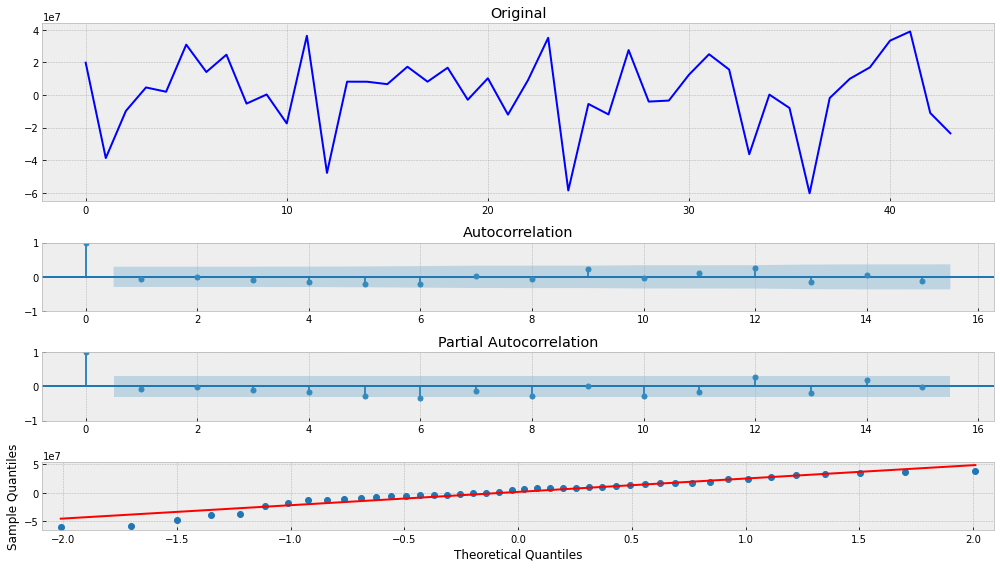

In [61]:
series = list(df_turnover_months['Turnover'])
# model = smapi.tsa.arima.ARIMA(train_data, order=(1,1,2))
# result = model.fit()

best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(7):#7
    for d in range(5): #2
        for j in range(5):#5
#             try:
                tmp_mdl = smt.ARIMA(series, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j) #6;1;4 при прогоне 7;7;7; такие же значение 6;1;4 и при 10;5;6
                    best_mdl = tmp_mdl
#             except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


tsplot(best_mdl.resid, lags=15)

корреляция видна каждые 12 месяцев. как и раньше наблюдаем сезональность

In [62]:
best_mdl

In [63]:
from statsmodels.graphics.tsaplots import plot_predict

построим реальный график и предсказанный моделью

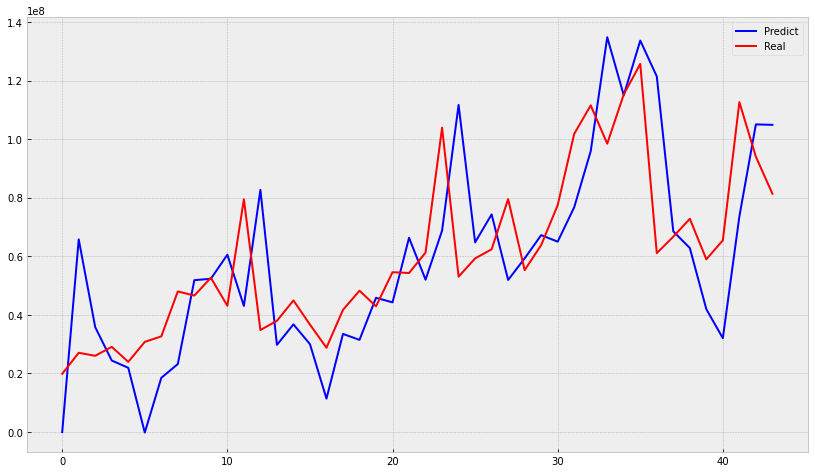

In [64]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
#     best_mdl.plot_predict(1, len(series)+100, ax=ax)
    plt.plot(best_mdl.predict() , color='blue', label='Predict') #(1, len(series)+100, ax=ax)
    plt.plot(series, color='red', label='Real')
    plt.legend()
    plt.show()

построим на одном графике LinearRegression, LogisticRegression, best_mdl(Arima)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:

y = np.array(series)
X = range(len(y))
X = np.array(X)
X = X.reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [67]:
model_LinearRegression = LinearRegression() # создадим объект этого класса и запишем в переменную model
model_LogisticRegression = LogisticRegression()
model_LinearRegression.fit(X_train, y_train) # обучим нашу модель
model_LogisticRegression.fit(X_train, y_train)

LogisticRegression()

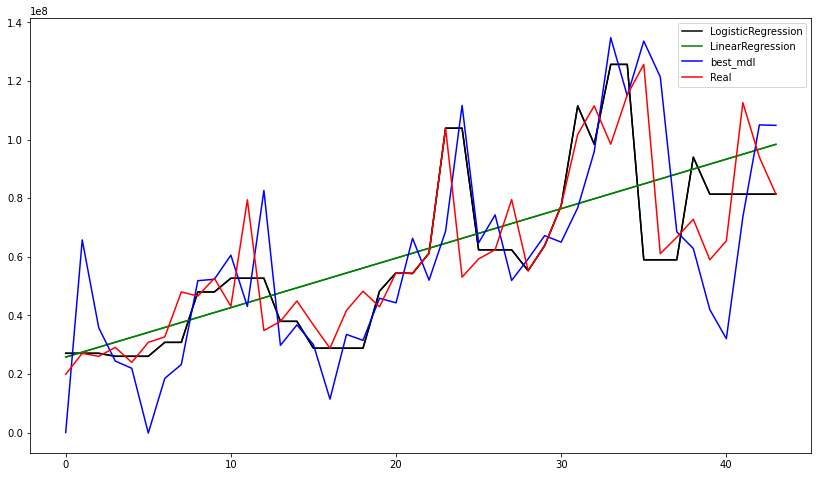

In [68]:
plt.figure(figsize=(14,8))
plt.plot(X, model_LogisticRegression.predict(X),color='black')
plt.plot(X, model_LogisticRegression.predict(X),color='black', label='LogisticRegression')
plt.plot(X, model_LinearRegression.predict(X),color='green')
plt.plot(X, model_LinearRegression.predict(X),color='green', label='LinearRegression')


ax = plt.axes()
# best_mdl.plot_predict(1, len(series)+100, ax=ax)
plt.plot(best_mdl.predict() , color='blue', label='best_mdl') #(1, len(series)+100, ax=ax)
plt.plot(series, color='red', label='Real')
plt.legend()
plt.show()

отрисуем интервалы и предсказания будущих периодов. Модель best_mdl


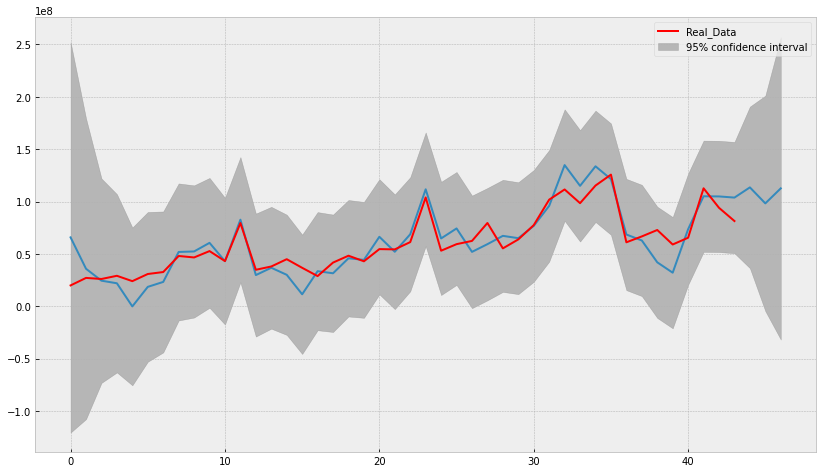

In [69]:
from statsmodels.graphics.tsaplots import plot_predict
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
#     best_mdl.plot_predict(1, len(series)+100, ax=ax)
    plot_predict(best_mdl, 1, len(series)+3, ax=ax, label='predict')
    plt.plot(series, color='red', label='Real_Data')
    plt.legend()
    plt.show()

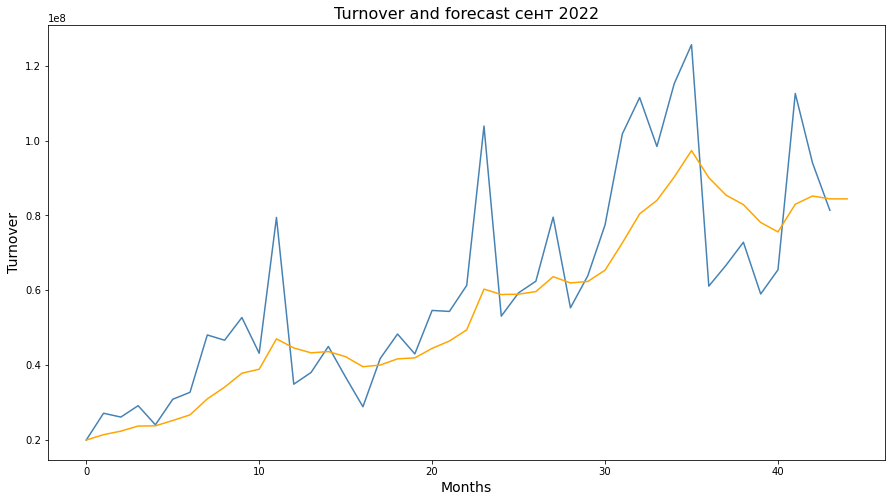

forecast сент 2022 84420511.19355978


In [70]:
# В модели экспоненциального сглаживания (exponential smoothing) или экспоненциального скользящего среднего 
# мы как раз (1) берем все предыдущие значения и (2) задаем каждому из наблюдений определенный вес и 
# (экспоненциально) уменьшаем этот вес по мере углубления в прошлое.
alpha = 0.2
 
# первое значение совпадает со значением временного ряда
# exp_smoothing = [births['Births'][0]]
exp_smoothing = [df_turnover_months['Turnover'][0]]
 
# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(df_turnover_months['Month'])):
    exp_smoothing.append(alpha * df_turnover_months['Turnover'][i] + (1 - alpha) * exp_smoothing[i - 1])
 
df_turnover_months['Exp_smoothing'] = exp_smoothing
# df_turnover_months.head(5)#['Exp_smoothing']


# зададим размер
plt.figure(figsize = (15,8))

forecast_turnover_exp = alpha * df_turnover_months['Turnover'][len(df_turnover_months['Month'])-1] + (1 - alpha) * exp_smoothing[len(df_turnover_months['Month']) - 2]
exp_smoothing.append(forecast_turnover_exp)
# выведем данные о рождаемости и кривую экспоненциального сглаживания
plt.plot(df_turnover_months['Turnover'], label = 'Turnover', color = 'steelblue')
# plt.plot(df_turnover_months['Exp_smoothing'], label = 'exp_smoothing_Turnover', color = 'orange')
plt.plot(exp_smoothing, label = 'exp_smoothing_Turnover', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
# plt.legend(title = '', loc = 'upper left', fontsize = 14)
# добавим подписи к осям и заголовки
plt.ylabel('Turnover', fontsize = 14)
plt.xlabel('Months', fontsize = 14)
plt.title('Turnover and forecast сент 2022', fontsize = 16)
 
plt.show()

print('forecast сент 2022' , exp_smoothing[-1])

# Нейронные сети

In [71]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [72]:
#ещё раз сформирует выборки. Будем прогнозировать август 22
#критерии такие же как и вверху. 
X = df.copy()
del X['08CY2022']
del X['Клиент']
Y = df['08CY2022'].copy()

criteria = [Y <= 1000, Y.between(1000, 5000), Y.between(5000, 10000), Y.between(10000, 20000), 
                Y.between(20000, 50000), Y.between(50000, 100000), Y.between(100000, 300000), Y >= 300000]
values = [1, 2, 3, 4, 5, 6, 7, 8]

Y = np.select(criteria, values, 0)
for i in df_columns[1:-1]:     
    criteria = [X[i] <= 1000, X[i].between(1000, 5000), X[i].between(5000, 10000), X[i].between(10000, 20000), 
                X[i].between(20000, 50000), X[i].between(50000, 100000), X[i].between(100000, 300000), X[i] >= 300000]
    values = [1, 2, 3, 4, 5, 6, 7, 8]
    X[i] = np.select(criteria, values, 0)

qty_months_int = X.shape[1]
qty_output_int = max(X.nunique())

In [73]:
#формируем слои сети
# на входе количество месяцев qty_months_int
# на выходе критерий qty_output_int

inputs = keras.Input(shape=(qty_months_int,)) # qty months - количество месяцев 
x = layers.Dense(32)(inputs) ### объявление слоя
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Activation('relu')(x)
#x = dense1(inputs) ### указание входного тензора

y = layers.Dense(32)(inputs)
y = layers.BatchNormalization()(y)
y = layers.Dropout(0.5)(y)
y = layers.Activation('relu')(y)

dense21 = layers.Dense(32, activation="relu")(x)
dense22 = layers.Dense(32, activation='relu')(y)

dense3 = layers.Add()([dense21, dense22])

In [74]:
x = layers.Dense(32, activation="relu")(dense3)
outputs = layers.Dense(qty_output_int+1)(x)

In [75]:
model = keras.Model(inputs=inputs, outputs=outputs, name="diplom_model_Keras")

In [76]:
model.summary()

Model: "diplom_model_Keras"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           1408        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           1408        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32)          128         ['dense[0][0]']                  
 alization)                                                                      

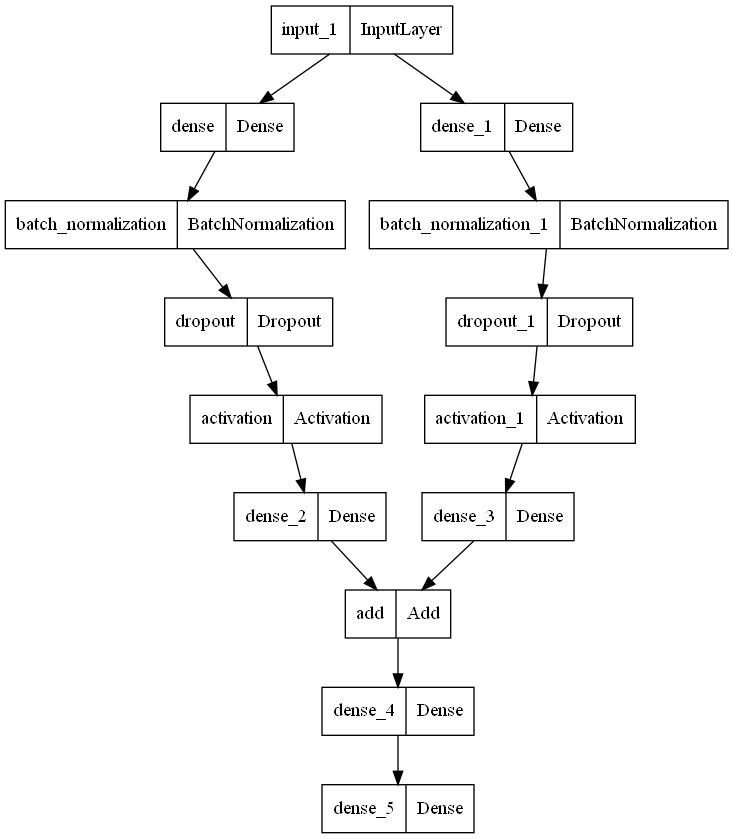

In [77]:
keras.utils.plot_model(model, "diplom_model_Keras.png")

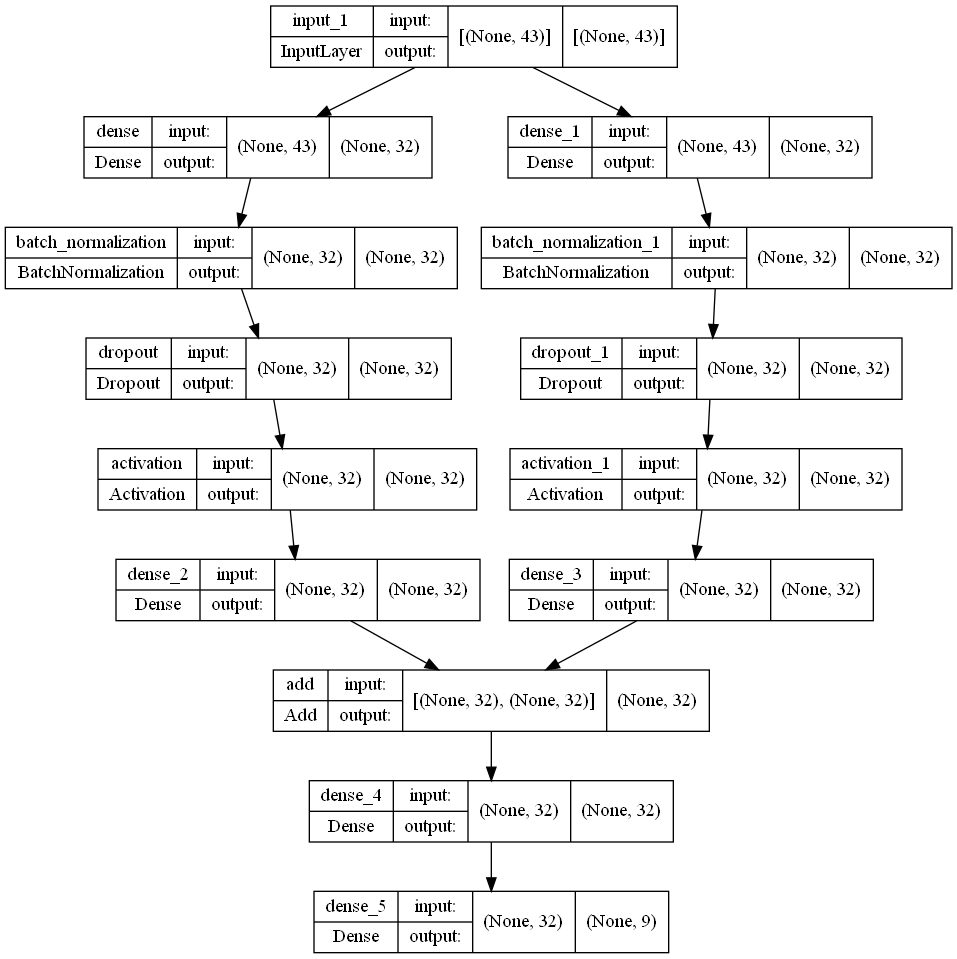

In [78]:
keras.utils.plot_model(model, "diplom_model_Keras_shape.png", show_shapes=True)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [80]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), ### ОТЛИЧИЕ_ОТ_CategoricalCrossEntropy
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, batch_size=8, epochs=10, validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/10
284/284 [==============================] - 5s 6ms/step - loss: 0.9632 - accuracy: 0.7769 - val_loss: 0.8636 - val_accuracy: 0.7887
Epoch 2/10
284/284 [==============================] - 1s 5ms/step - loss: 0.8174 - accuracy: 0.7875 - val_loss: 0.7584 - val_accuracy: 0.7958
Epoch 3/10
284/284 [==============================] - 1s 5ms/step - loss: 0.8145 - accuracy: 0.7906 - val_loss: 0.7626 - val_accuracy: 0.8011
Epoch 4/10
284/284 [==============================] - 1s 5ms/step - loss: 0.7869 - accuracy: 0.7866 - val_loss: 0.7247 - val_accuracy: 0.7993
Epoch 5/10
284/284 [==============================] - 1s 5ms/step - loss: 0.7902 - accuracy: 0.7892 - val_loss: 0.7223 - val_accuracy: 0.7958
Epoch 6/10
284/284 [==============================] - 1s 5ms/step - loss: 0.7919 - accuracy: 0.7906 - val_loss: 0.7467 - val_accuracy: 0.8028
Epoch 7/10
284/284 [==============================] - 1s 5ms/step - loss: 0.7760 - accuracy: 0.7901 - val_loss: 0.7271 - val_accuracy: 0.7993
Epoch 

точность на тестовой выборки 79%. В принципе такая же как и на других моделях